# Data smooth with a Fourier series of the form

$ f(x) = \sum_{q=1}^{N} A_n cos(q\frac{2\pi}{L}x) + \sum_{q=1}^{N} B_n cos(q \frac{2\pi}{L}x),  \ q=(1,N) $

 
 

In [70]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,6))
line, = ax.plot(depth_array[:,0], u[:,0])
line0, = ax.plot(depth_array[:,0], u_fit[:,0])
plt.close()
#line1, = plt.plot([b_bot[0], b_bot[0] ],[0 ,0.015],'r')
#line2, = plt.plot([b_top[0],b_top[0] ],[0,0.015],'r')
def animate(i):
    line.set_ydata(u[:,i])  # update the data
    line.set_xdata(depth_array[:,i])
    line0.set_ydata(u_fit[:,i])  # update the data
    line0.set_xdata(depth_array[:,i])
    ax.set_ylim((min(u[:,i]),max(u[:,i])))
    ax.set_title("ADCP zonal profiles with their fit 20th order Fourier Fit, frame = {:} ".format(i), fontname = "serif", fontsize = 16)
    ax.set_xlabel('Depth[m]')
    ax.set_ylabel('velocity [m/s]')
    #line1.set_xdata([b_bot[i],b_bot[i]])  # update the data
    #line2.set_xdata([b_top[i],b_top[i]])
    return line, line0
ani = animation.FuncAnimation(fig, animate, 100,
                              interval=500, blit=True)
HTML(ani.to_html5_video())

In [8]:

%matplotlib inline
fig, ax = plt.subplots(figsize=(10,6))
line, = ax.plot(depth_array[:,0], v[:,0])
line0, = ax.plot(depth_array[:,0], v_fit[:,0])
plt.close()
#line1, = plt.plot([b_bot[0], b_bot[0] ],[0 ,0.015],'r')
#line2, = plt.plot([b_top[0],b_top[0] ],[0,0.015],'r')
def animate(i):
    line.set_ydata(v[:,i])  # update the data
    line.set_xdata(depth_array[:,i])
    line0.set_ydata(v_fit[:,i])  # update the data
    line0.set_xdata(depth_array[:,i])
    ax.set_ylim((min(v[:,i]),max(v[:,i])))
    ax.set_title("ADCP meridional profiles with their 20th order Fourier Fit, frame = {:} ".format(i), fontname = "serif", fontsize = 16)
    ax.set_xlabel('Depth[m]')
    ax.set_ylabel('velocity [m/s]')
    #line1.set_xdata([b_bot[i],b_bot[i]])  # update the data
    #line2.set_xdata([b_top[i],b_top[i]])
    return line, line0
ani = animation.FuncAnimation(fig, animate, 100,
                              interval=500, blit=True)
HTML(ani.to_html5_video())

In [62]:
%matplotlib inline
#comparison between 7th and 15th order 
fig, ax = plt.subplots()
line, = ax.plot(depth_array[:,0], sh_sq_fit[:,0])
line0, = ax.plot(depth_array[:,0], sh_sq_fit9[:,0])
line1, = plt.plot([b_bot[0], b_bot[0] ],[0 ,0.015],'r')
line2, = plt.plot([b_top[0],b_top[0] ],[0,0.015],'r')
plt.close()
def animate(i):
    line.set_ydata(sh_sq_fit[:,i])  # update the data
    line.set_xdata(depth_array[:,i])
    line0.set_ydata(sh_sq_fit9[:,i])  # update the data
    line0.set_xdata(depth_array[:,i])
    ax.set_title("Shear Squared, frame = {:} ".format(i), fontname = "serif", fontsize = 16)
    line1.set_xdata([b_bot[i],b_bot[i]])  # update the data
    line2.set_xdata([b_top[i],b_top[i]])
    return line, line1, line2,

ani = animation.FuncAnimation(fig, animate, 300,
                              interval=1000, blit=True)
HTML(ani.to_html5_video())

<IPython.core.display.Javascript object>


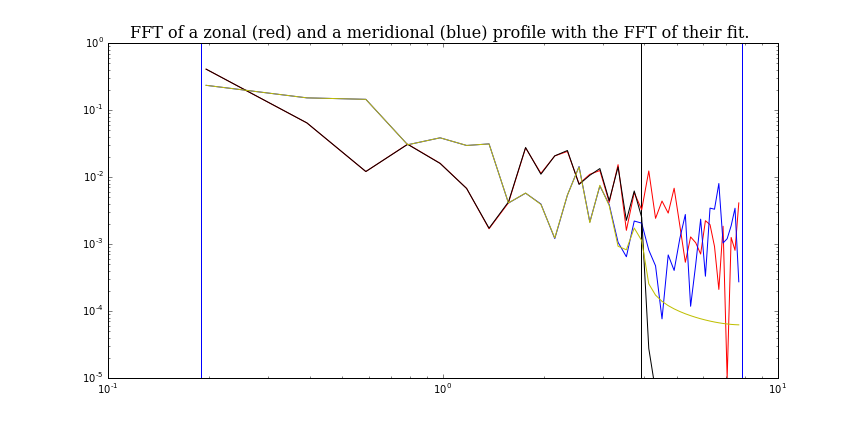

In [42]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(12,6))
#ax.set_xlim(6e-6, 1.2e-2)
dt=0.4
series_1 = u[:,100]   
series_2 = v[:,100]
series_3 = u_fit[:,100]
series_4 = v_fit[:,100]
# Using fft to find tidal signal frequncy/period range
N = len(series_1)
k = np.arange(len(series_1))+1
Fs = 2*np.pi/dt   
freq = Fs*k/len(series_1) # Frequency vector
period = 1/freq # Period vector
import numpy.fft as npfft
E_1 = np.abs(np.fft.fft(series_1))**2
E_2 = np.abs(np.fft.fft(series_2))**2
E_3 = np.abs(np.fft.fft(series_3))**2
E_4 = np.abs(np.fft.fft(series_4))**2

freqs_1 = 2*np.pi*np.fft.fftfreq(series_1.size, dt)
freqs_2 = 2*np.pi*np.fft.fftfreq(series_2.size, dt)
freqs_3 = 2*np.pi*np.fft.fftfreq(series_3.size, dt)
freqs_4 = 2*np.pi*np.fft.fftfreq(series_4.size, dt)

plt.plot([0.19, 0.19 ],[1e-5 ,1e0],'b')   # 2*pi/32
plt.plot([7.85, 7.85 ],[1e-5 ,1e0],'b')   # 2*pi/0.4 

plt.plot([3.92, 3.92 ],[1e-5 ,1e0],'k')


ax.loglog(freqs_1,E_1/Fs,'r') 
ax.loglog(freqs_2,E_2/Fs,'b')
ax.loglog(freqs_3,E_3/Fs,'k')
ax.loglog(freqs_4,E_4/Fs,'y')
ax.set_ylim(1e-5,1e0)
#fig.suptitle(r'BLue lines corresponds to' +  '\n'+ 'dd '+'\n'+'alsjkdn', fontsize=14, fontweight='bold')
ax.set_title("FFT of a zonal (red) and a meridional (blue) profile with the FFT of their fit. ",
             fontname = "serif", fontsize = 16)

plt.show()


#$N^2$


<IPython.core.display.Javascript object>


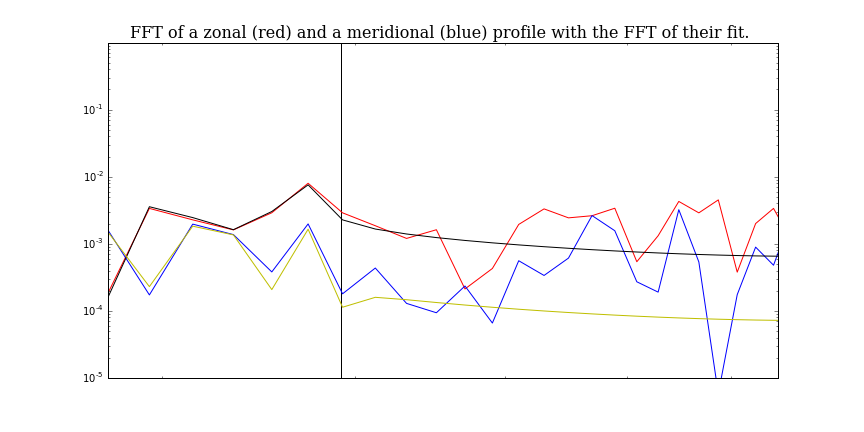

In [44]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(12,6))
#ax.set_xlim(6e-6, 1.2e-2)
dt=0.4
series_1 = u[:,1000]   
series_2 = v[:,1000]
series_3 = u_fit[:,1000]
series_4 = v_fit[:,1000]
# Using fft to find tidal signal frequncy/period range
N = len(series_1)
k = np.arange(len(series_1))+1
Fs = 2*np.pi/dt   
freq = Fs*k/len(series_1) # Frequency vector
period = 1/freq # Period vector
import numpy.fft as npfft
E_1 = np.abs(np.fft.fft(series_1))**2
E_2 = np.abs(np.fft.fft(series_2))**2
E_3 = np.abs(np.fft.fft(series_3))**2
E_4 = np.abs(np.fft.fft(series_4))**2

freqs_1 = 2*np.pi*np.fft.fftfreq(series_1.size, dt)
freqs_2 = 2*np.pi*np.fft.fftfreq(series_2.size, dt)
freqs_3 = 2*np.pi*np.fft.fftfreq(series_3.size, dt)
freqs_4 = 2*np.pi*np.fft.fftfreq(series_4.size, dt)

plt.plot([0.19, 0.19 ],[1e-5 ,1e0],'b')   # 2*pi/32
plt.plot([7.85, 7.85 ],[1e-5 ,1e0],'b')   # 2*pi/0.4 

plt.plot([3.92, 3.92 ],[1e-5 ,1e0],'k')


ax.loglog(freqs_1,E_1/Fs,'r') 
ax.loglog(freqs_2,E_2/Fs,'b')
ax.loglog(freqs_3,E_3/Fs,'k')
ax.loglog(freqs_4,E_4/Fs,'y')
ax.set_ylim(1e-5,1e0)
#fig.suptitle(r'BLue lines corresponds to' +  '\n'+ 'dd '+'\n'+'alsjkdn', fontsize=14, fontweight='bold')
ax.set_title("FFT of a zonal (red) and a meridional (blue) profile with the FFT of their fit. ",
             fontname = "serif", fontsize = 16)

plt.show()


#$N^2$

In [ ]:
U=u.reshape(80*1459,1)
V=v.reshape(80*1459,1)
U_fit=u_fit.reshape(80*1459,1)
V_fit=v_fit.reshape(80*1459,1)

<IPython.core.display.Javascript object>


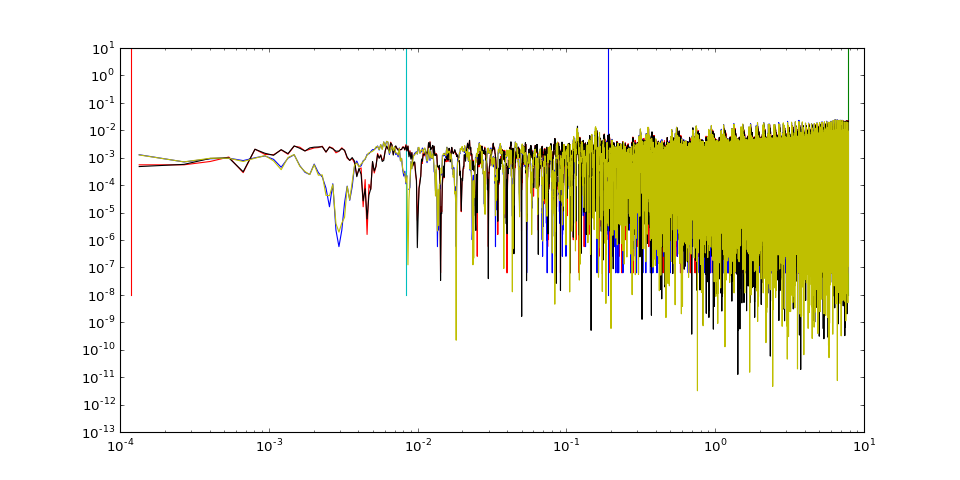

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in true_divide


In [43]:
%matplotlib notebook
fig, ax = plt.subplots(figsize=(12,6))
#ax.set_xlim(6e-6, 1.2e-2)
dt=0.4
series_1 = U   
series_2 = V
series_3 = U_fit
series_4 = V_fit
# Using fft to find tidal signal frequncy/period range
N = len(series_1)
k = np.arange(len(series_1))
Fs = 2*np.pi/dt   
freq = Fs*k/len(series_1) # Frequency vector
period = 1/freq # Period vector
import numpy.fft as npfft
E_1 = np.abs(np.fft.fft(series_1))**2
E_2 = np.abs(np.fft.fft(series_2))**2
E_3 = np.abs(np.fft.fft(series_3))**2
E_4 = np.abs(np.fft.fft(series_4))**2

freqs_1 = 2*np.pi*np.fft.fftfreq(series_1.size, dt)
freqs_2 = 2*np.pi*np.fft.fftfreq(series_2.size, dt)
freqs_3 = 2*np.pi*np.fft.fftfreq(series_3.size, dt)
freqs_4 = 2*np.pi*np.fft.fftfreq(series_4.size, dt)

plt.plot([0.19, 0.19 ],[1e-8 ,1e1])   # 2*pi/32
plt.plot([7.85, 7.85 ],[1e-8 ,1e1])   # 2*pi/0.4 


plt.plot([1.19e-4, 1.19e-4],[1e-8 ,1e1])   # Inertial frequency at latitude 54.5 N          
plt.plot([8.4e-3, 8.4e-3],[1e-8 ,1e1])# N frequency: $
ax.loglog(freqs_1,E_1/Fs,'r') 
ax.loglog(freqs_2,E_2/Fs,'b')
ax.loglog(freqs_3,E_3/Fs,'k')
ax.loglog(freqs_4,E_4/Fs,'y')
plt.show()

#$N^2$